Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting (use %matplotlib inline).

Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.

# 1. Model Complexity and Bias/Variance Trade-off (20 points)

i) Load the data given in `all_data_q5.npy` using `numpy.load()` function. This dataset contains the train and test datasets in `(x_train, y_train)` and `(x_test, y_test)` respectively.

Now, fit the polynomial models of degrees 1, 5, and 10 on the training data, and print out the mean squared error for train and test datasets for all the models. Essentially, we are trying to fit linear models of this form: $\hat f(x) = \beta_0 + \beta_1x + \beta_1 x^2 + ... + \beta_px^p$, where $p$ is the degree of the polynomial. (5 points)

ii) Visualise the trained models by making predictions on evenly spaced numbers on x-axis in a fixed range, for eg. you can generate x's by calling `x_all = np.linspace(0, 1, 75).reshape(-1,1)` and call predict on x_all.

In the same figure, add the following plots:

a) Train data plot : y_train vs x_train

b) Test data plot : y_test vs x_test

All the plots must clearly labeled. (5 points)



**Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train` and you can call `np.vander` inside the fit method of linear regression.


Make use of the starter code we have provided, and fill the `plot_curves` function.

C:\Users\I068117\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\I068117\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


<AxesSubplot:>

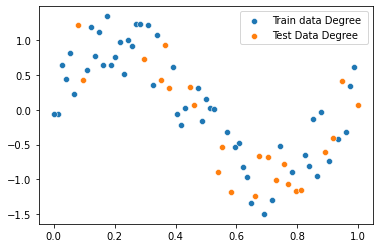

In [3]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import seaborn as sns

import numpy as np
%matplotlib inline

data_load = np.load('./all_data_q5.npy', allow_pickle=True)
x_train = data_load.item().get("x_train")
y_train = data_load.item().get("y_train")
x_test = data_load.item().get("x_test")
y_test = data_load.item().get("y_test")

sns.scatterplot(x=x_train, y=y_train, label=f'Train data Degree ')
sns.scatterplot(x=x_test, y=y_test, label=f'Test Data Degree ')

Degree 1   RMSE Train: 0.57 RMSE Test: 0.61


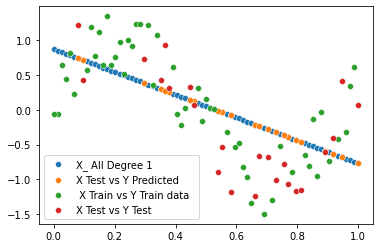

Degree 5   RMSE Train: 0.31 RMSE Test: 0.31


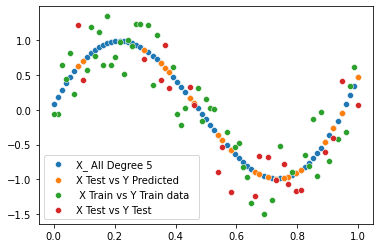

Degree 10   RMSE Train: 0.28 RMSE Test: 0.51


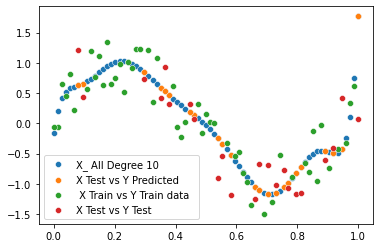

In [39]:

def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 1, 5, 10 to the training data.
  # Print out the mean squared error (on both train and test sets) for all the models.
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test).

    for i in (1, 5, 10):
        polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
        poly_x_train = polynomial_converter.fit_transform(x_train.reshape(-1, 1))
        poly_x_test = polynomial_converter.transform(x_test.reshape(-1, 1)) 

        lrp = LinearRegression().fit(poly_x_train, y_train)  # Fit with the transformed training data

        Y_train_pred = lrp.predict(poly_x_train)
        MAE_train = mean_squared_error(y_train, Y_train_pred)
        RMSE_train = np.sqrt(MAE_train)

        Y_test_pred = lrp.predict(poly_x_test)
        MAE_test = mean_squared_error(y_test, Y_test_pred)
        RMSE_test = np.sqrt(MAE_test)

        print(f'Degree {i}   RMSE Train: {round(RMSE_train,2)} RMSE Test: {round(RMSE_test,2)}')

        x_all = np.linspace(0, 1, 75).reshape(-1, 1)
        y_all_pred = lrp.predict(polynomial_converter.transform(x_all))
        plt.figure()
        sns.scatterplot(x=x_all.flatten(), y=y_all_pred.flatten(), label=f'X_ All Degree {i}')
        sns.scatterplot(x=x_test.flatten(), y=Y_test_pred.flatten(), label=f'X Test vs Y Predicted')
        sns.scatterplot(x=x_train, y=y_train, label=f' X Train vs Y Train data  ')
        sns.scatterplot(x=x_test, y=y_test, label=f'X Test vs Y Test  ')
        plt.legend()
        plt.show()

plot_curves(x_train, y_train, x_test, y_test)

iii) Which model gives the best performance (measured by MSE)? Explain in terms of the bias-variance tradeoff. (5 points)



Answer: Model with degree 5 gives the best performance with the lowest RMSE. Model with Degree 1 has high bias and low variance.As we keep increasing the complexity of the model to degree 5 to 10, the bias reduces but the variance increases. Even a small change in the training set could impact the model results. We need to make a trade off to select a model which has low bias & low variance. 

iv) Analyse how the training data size affects bias and variance of the models. For this, run the analysis in (i) with the given (x_train, y_train) and (x_test, y_test), but now randomly select 20%, 40%, 60%, 80% and all 100% of the data from the train dataset to use for training the model but keep the test dataset same in each case.

Now, for each of the three models corresponding to the degrees 1, 5 and 10, plot $log(MSE)$ on train dataset vs the size of the training data and again $log(MSE)$ on test dataset vs the size of the training data. State the trends you see as you change the size of the training data on each of the models and explain why you see them. All plots must be in a single figure and labelled correctly. Study the effects of the training data size on the bias and variance (5 points).

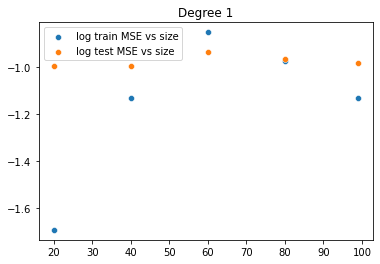

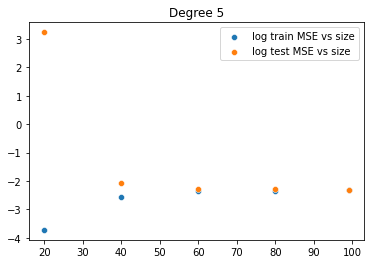

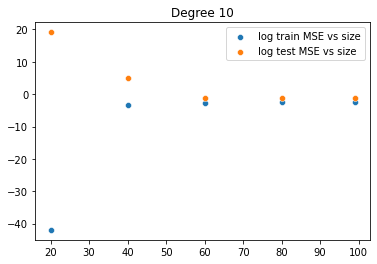

In [36]:
from sklearn.model_selection import train_test_split
# Split the data into 80% for training and 20% for testing


def plot_curves_size(x_train, y_train, x_test, y_test):
     for i in (1, 5, 10):
            polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
            MAE_train=[]
            MAE_test=[]
            for x in (20,40,60,80,99):
                x_train_, _, y_train_,_ = train_test_split(x_train, y_train, test_size=1-(x*0.01), random_state=42)
                poly_x_train = polynomial_converter.fit_transform(x_train_.reshape(-1, 1))
                poly_x_test = polynomial_converter.transform(x_test.reshape(-1, 1)) 

                lrp = LinearRegression().fit(poly_x_train, y_train_)  # Fit with the transformed training data

                Y_train_pred = lrp.predict(poly_x_train)
                MAE_train.append(mean_squared_error(y_train_, Y_train_pred))
                RMSE_train = np.sqrt(MAE_train)

                Y_test_pred = lrp.predict(poly_x_test)
                MAE_test.append(mean_squared_error(y_test, Y_test_pred))
                RMSE_test = np.sqrt(MAE_test)

                #print(f'Degree {i}   RMSE Train: {round(RMSE_train,2)} RMSE Test: {round(RMSE_test,2)}')

            plt.figure()
            plt.title(f'Degree {i}')
            sns.scatterplot(x=[20,40,60,80,99], y=np.log(MAE_train), label=f'log train MSE vs size')
            sns.scatterplot(x=[20,40,60,80,99], y=np.log(MAE_test), label=f'log test MSE vs size')
            plt.legend()
        
plot_curves_size(x_train, y_train, x_test, y_test)



Trends: 
1. Simple models because of low variance, tend to perform similar with smaller or larger training data sets. A small change in data set will not change the test results much.

2. Complex models on the other hand have high variance, if we tain on small training data, we tend to overfit and as a result we get a high difference in train & test MSE. As we train on more data, complex models tend to do better with similar errors closer to 0 for both train & test.
